In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
from sklearn import datasets
from IPython.display import Image
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120

#!pip install mlxtend

In [2]:
iris = datasets.load_iris(as_frame=True)
iris_df = iris['data']
target = iris['target']

# Dataset Introduction

- _"We will use a single example dealing with three species of the iris flower. This data comes from a famous experiment on a series of measurements of three species of iris flowers. R A Fisher, a statistically minded thinker in the early twentieth centure used this dataset in his 1936 paper The Use of multiple measurements in taxonomic problems, published in the Annals of Eugenics. We will begin by using this data to investigate some basic questions one might have about the data. These questions will not be limited to this dataset however, and we must note that there is some kind of relationship to Eugenics in the taxonomic problem for Fisher."_ https://bookdown.org/koehlerj/qr_book/introducing-the-iris-dataset.html

- We'll come back to this dataset when discussing clustering later as well.

- _"How to classify three species of Iris flowers (Versicolor, Setosa, and Virginica) without using labels"_

- _"The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species._
    
    _The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), and 150 records under five attributes - sepal length, sepal width, petal length, petal width and species. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters."_ https://cloudxlab.com/assessment/displayslide/5165/keras-project-iris-flower-identification-introduction-to-iris-dataset

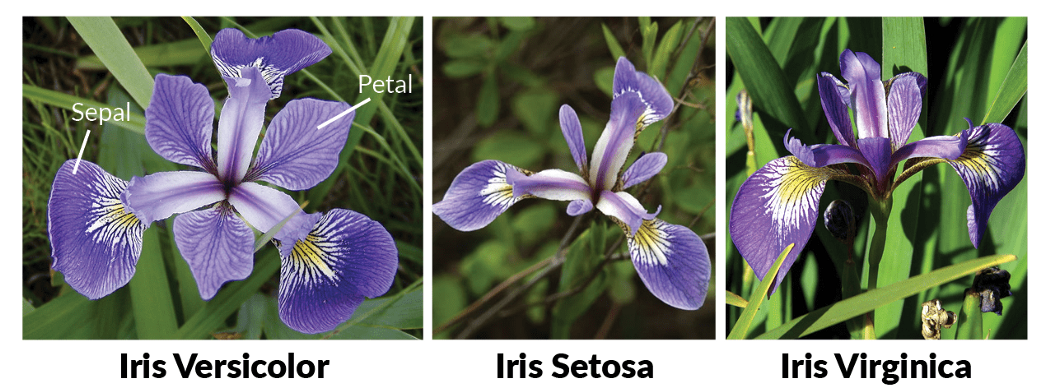

In [3]:
Image("1_2b9TA6i27eGjeDQE9qUaEg.png") # Image from: 

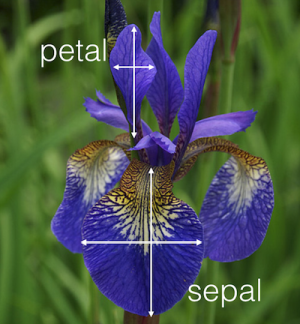

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
display(Image("03_iris.png")) # Image from: https://www.ritchieng.com/machine-learning-iris-dataset/
iris_df.head()

In [5]:
from sklearn.preprocessing import LabelEncoder

# get the labels of flowers capetalised for vidualisation
target_names = list(map(lambda s: s.capitalize(), iris['target_names']))

# create a dictionary with the original labels decoded (inverse of LabelEncoder)
decode_label = dict(zip(range(3), target_names))

# make a label encoder to use later if needed
le = LabelEncoder().fit(target_names)

decode_label

{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [6]:
# add the target labels to df for visualisation purposes
iris_vis = pd.concat([iris_df, target],axis=1)
# turn the ints to labels
iris_vis["target"] = iris_vis["target"].replace(decode_label)

iris_vis.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


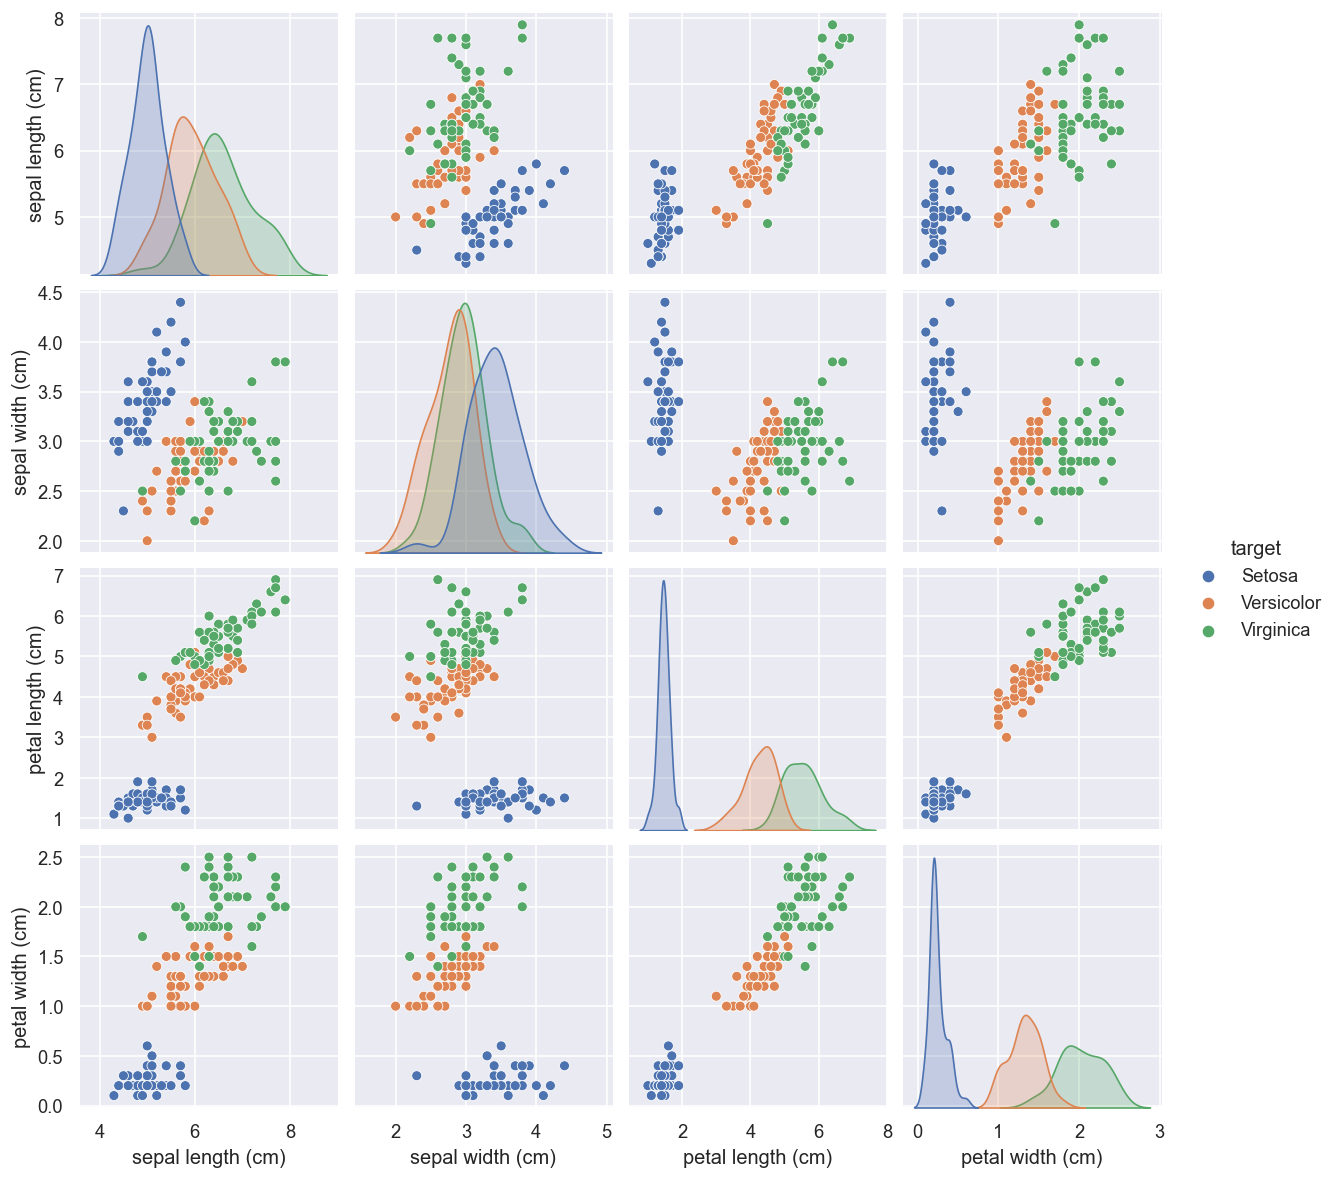

In [7]:
sns.pairplot(iris_vis, hue="target", height=2.5)

In [8]:
set_versi = iris_vis[["petal length (cm)", "petal width (cm)", "target"]]
set_versi = set_versi[set_versi.target != "Virginica"]

def set_versi_plot():
    sns.scatterplot(data=set_versi, x = "petal length (cm)", 
                y = "petal width (cm)", hue="target", 
                style = "target")
    plt.axis([0, 5.5, 0, 2])
    plt.title("Petal lengths and widths of Setosa and Versicolor flowers")

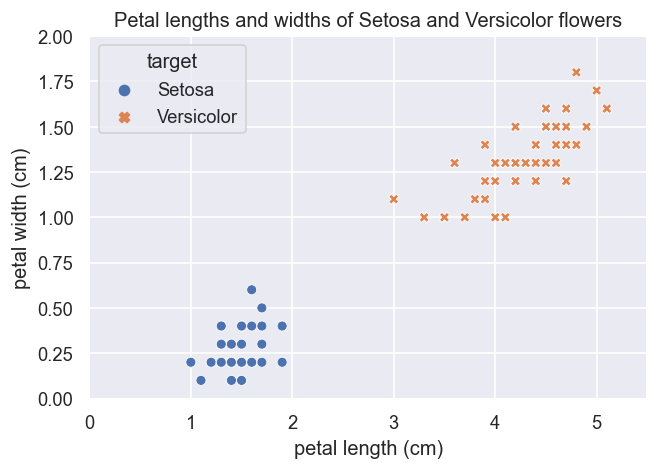

In [9]:
set_versi_plot()
plt.show()

In [10]:
# Altered https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.svm import SVC
x0 = np.linspace(0, 5.5, 200)
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

X = set_versi[["petal length (cm)", "petal width (cm)"]].values
y = le.transform(set_versi[["target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

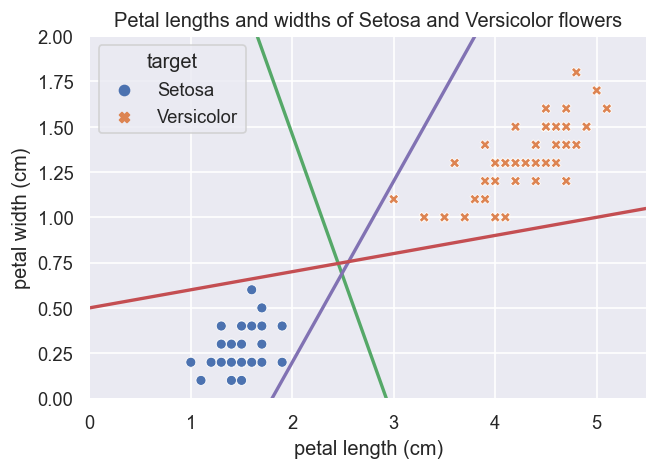

In [11]:
set_versi_plot()
plt.plot(x0, decision_boundary, "g-", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.show()

In [12]:
# Altered https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
def plot_svc_decision_boundary(clf, xmin, xmax):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = clf.support_vectors_
    sns.scatterplot(x = svs[:, 0], y = svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "g-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

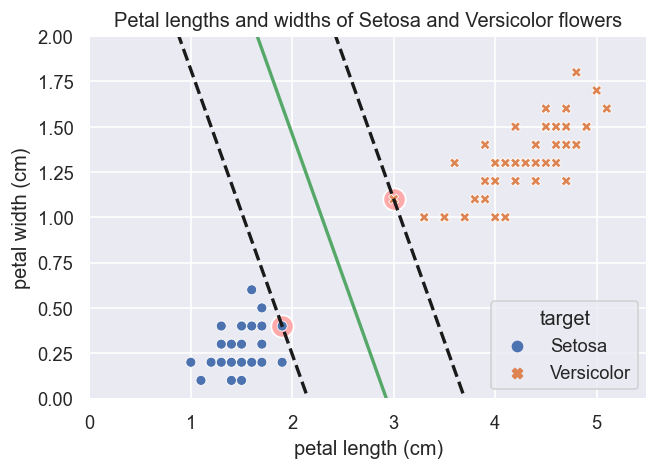

In [13]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
set_versi_plot()
plt.show()

# Support Vector Machines

The term Support Vector Machines (SVM's) is sometimes used loosely to refer to three methods; maximal margin classifier, a support vector classifier, and a support vector machine. Each are an extension of the previous method, allowing them to be applied to a broader range of cases.

Support Vector Machines (SVM) are a common discriminative algorithm, well suited to *complex* small- to medium sized datasets<sup>2</sup>, which aim to find a hyperplane that provides the maximum margin of separation between classes of objects. They can be used for both classification and regression.

**NOTES**
- Images from the Hands on machine learning (using the petal data)
- some explanation from the python ML
- structure of the Intro to stats learning & some algebra
- Some algebra from Machine learning: a probabilitistic perspective.

---
1. James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

"Developed in the computer science community in the 1990s"<sup>1</sup>

"generalisation of the maximal margin classifier" which requires a linear boundary - SVC as an extension can be applied to a broader range of cases<sup>1</sup>

---
1. James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.

# Classification
## Linear

Maximal margin classifier which induces a linear decision boundary on the feature space. SVMs simply divide the space to outline a decision boundary. Lewts have a look at a decision boundary

In SVM context two classes are (perfectly) separable by a K − 1 dimensional hyperplane. In one dimension the separator is a point, in two dimensions - a line, in three - a plane and so on.

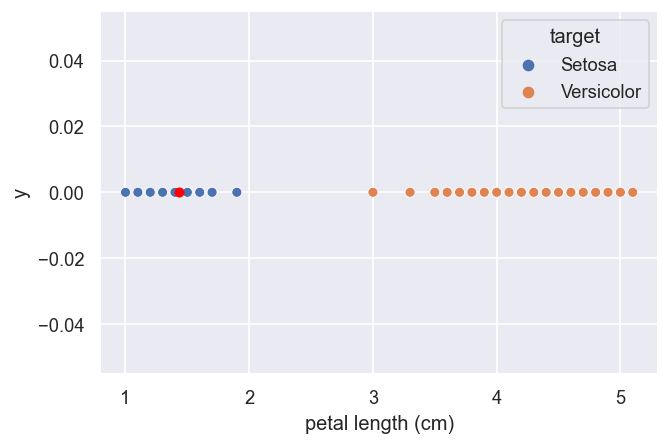

In [14]:
# TODO: get this to work... as currently it doesn't
from sklearn.svm import LinearSVC

def one_dim():
    # One Dimension
    one_d = set_versi[["petal length (cm)", "target"]]
    one_d['y'] = [0]*len(set_versi)
    one_d
    sns.scatterplot(data = one_d, x = "petal length (cm)", y = 'y', hue="target")

    # SVM Classifier model
    svm_clf = SVC(kernel='linear')
    svm_clf.fit(set_versi[["petal length (cm)"]].values, set_versi[["target"]].values.ravel())
    w = svm_clf.coef_[0]
    x_0 = -svm_clf.intercept_[0]/w[0]
    plt.plot(w, 0, marker='o', markersize=5, color="red")

    plt.show()
    
one_dim()

In [15]:
# Three Dimension
%matplotlib notebook

def three_dim():
    X = iris.data.values[:, :3]  # we only take the first three features.
    Y = iris.target

    # make it binary classification problem
    X = X[np.logical_or(Y==0,Y==1)]
    Y = Y[np.logical_or(Y==0,Y==1)]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    x = X[:, 0]
    y = X[:, 1]
    z = X[:, 2]

    ax.set_xlabel(iris_df.columns[0])
    ax.set_ylabel(iris_df.columns[1])
    ax.set_zlabel(iris_df.columns[2])

    ax.scatter(x, y, z)

    # SVM
    model = SVC(kernel='linear')
    clf = model.fit(X, Y)

    # The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
    # Solve for w3 (z)
    z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

    xm, xM = X[:,0].min(), X[:, 0].max()
    ym, yM = X[:,1].min(), X[:, 1].max()

    number_of_squares = 10
    x = np.linspace(xm, xM, number_of_squares)
    y = np.linspace(ym, yM, number_of_squares)
    x, y =np.meshgrid(x, y)
    ax.plot_surface(x, y, z(x,y), alpha=0.5)

    plt.show()

<IPython.core.display.Javascript object>


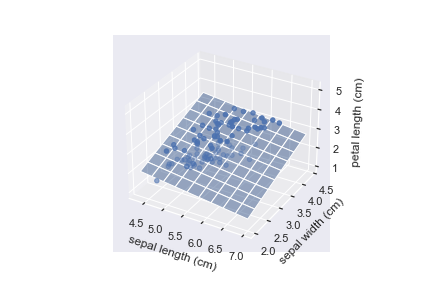

In [16]:
%matplotlib notebook
three_dim()

[More description on what a Hyperplane is and demonstration]

A subset of training data, known as support vectors, are selected by an algorithm to compute the optimal separation hyperplane between classes. 

If data can be linearly separated, then a 'hard margin' of separation can be used; whereby a point on the edge of a class is used as the support vector for the decision boundary. 

However this method is sensitive to outliers, so a more flexible method may be preferable, using a soft margin of separation to compute a hyperplane that still provides a maximum margin of separation, whilst still allowing for some errors. 

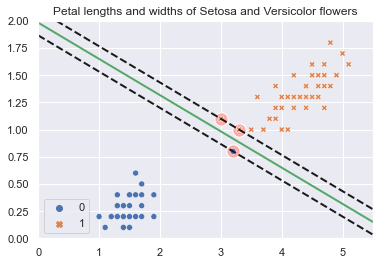

In [17]:
%matplotlib inline
# adapted from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo = np.concatenate([X, X_outliers[1:]], axis=0)
yo = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(Xo, yo)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
sns.scatterplot(x = Xo[:,0], y = Xo[:,1], hue=yo, style = yo)
plt.axis([0, 5.5, 0, 2])
plt.title("Petal lengths and widths of Setosa and Versicolor flowers")

plt.show()
plt.close()

[Discussion of Maximising the Decision margin]

## Soft Margin

Not always the data could be perfectly separated by a K − 1 dimensional hyperplane. To overcome this problem we could either tweak the constraints on the hyperplane to allow some points to be misclassified (soft margin) or alternatively we could transform the data to be separable by a hyperplane in another space (kernel method).

In Scikit-Learn's SVM class this can be controlled by the C hyperparameter; with a smaller C creating a wider boundary but with more margin violations.

In [18]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

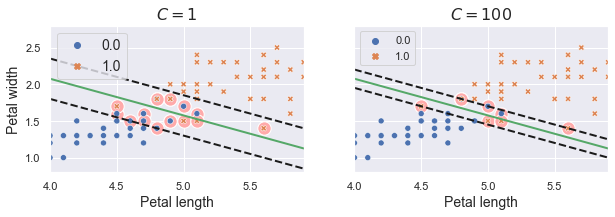

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

virgin_versi = iris_vis[["petal length (cm)", "petal width (cm)", "target"]]
virgin_versi = virgin_versi[virgin_versi.target != "Setosa"]

X = virgin_versi[["petal length (cm)", "petal width (cm)"]].values
#y = le.transform(virgin_versi[["target"]].values.ravel())
# TEMP FIX!
y = np.array([0.]*50+[1.0]*50)

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
sns.scatterplot(x = X[:,0], y = X[:,1], hue=y, style = y)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
sns.scatterplot(x = X[:,0], y = X[:,1], hue=y, style = y)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

C:\Users\delliot2\Anaconda3\envs\Teaching\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(4.0, 5.9, 0.8, 2.8)

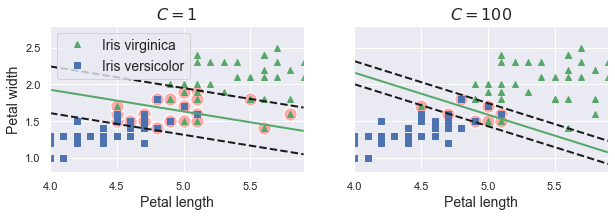

In [52]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

In [35]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Non-linear
A hyperplane does not need to be linear as the input feature space can be projected to higher dimensions using a kernel (e.g. radial basis kernel<sup>2,3</sup>), allowing a hyperplane to be fitted to split the data into classes. The data can then be mapped back into the original feature space to create a nonlinear separation boundary.

---
2. Cover, T. M. (1965). Geometrical and statistical properties of systems of linear inequalities with applications in pattern recognition. IEEE transactions on electronic computers, (3), 326-334.
3. Varsavsky, A., Mareels, I., & Cook, M. (2016). Epileptic seizures and the EEG: measurement, models, detection and prediction. CRC Press.

[Describe Mercer's Theorem using Hands on Machine Learning]

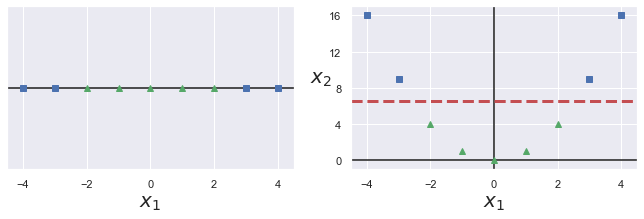

In [32]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

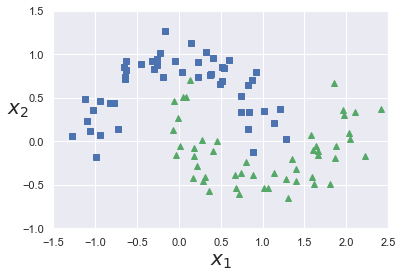

In [33]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [34]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\delliot2\Anaconda3\envs\Teaching\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [ ]:
# 3d plot?

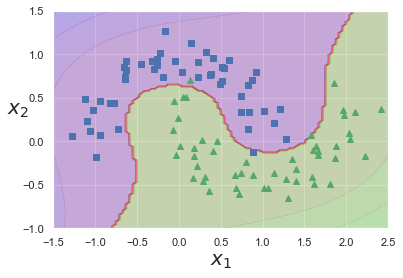

In [37]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

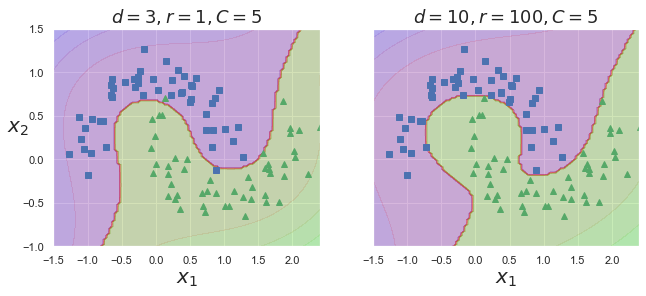

In [39]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

[Describe and demonstrate various kernels]

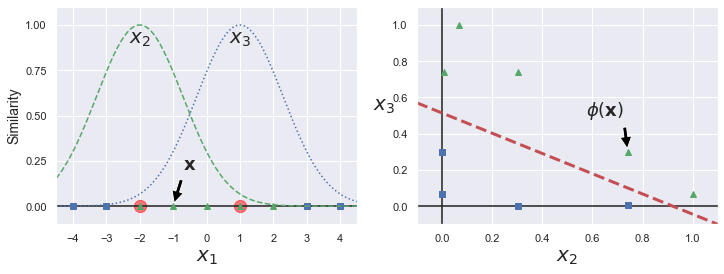

In [41]:
# copied from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

Phi(-1.0, -2) = [0.00673795]
Phi(-1.0, 1) = [2.06115362e-09]


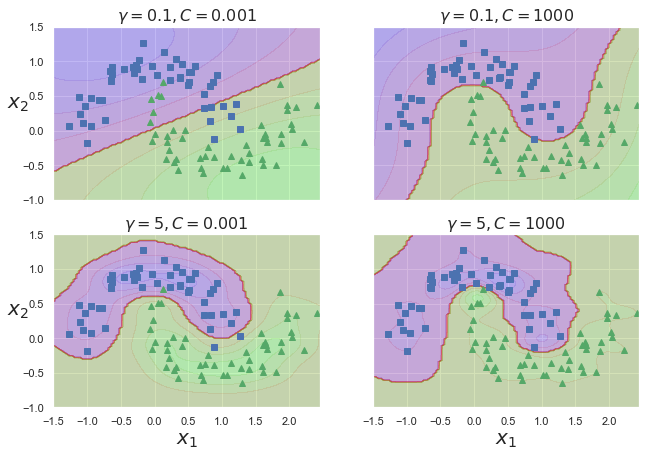

In [43]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))
    
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# Regression

# Implimentation

There are three classes for SVM classification in Scikit-Learn (table below adapted from Géron(2017)<sup>1</sup>):

| Class                | Time Complexity                                                                      | Out-of-core Support | Kernel Trick|
|------------------------|-------------------------------------------------------------------------------------------|---------------------------------|--------------------|
| LinearSVC       | 0(*m* x *n*)                                                                               | No                               | No                |
| SGDClassifier | 0(*m* x *n*)                                                                               | Yes                              | No                |
| SVC                  | 0(*m*<sup>2</sup> x *n*) to 0(*m*<sup>3</sup> x *n*) | No                               | Yes               |

First lets make a pipeline with two steps:

1. Standardize the features
2. SVM

For the SVM we'll just use the SVC and set the kernel to linear so we can compare the decision boundary to the logistic regression as we did before. The data in our examples is quite small so using SVC, although takes longer than the other two methods, is fine for this dataset.

## Dimensionality Reduction and SVM
In order to reduce a models complexity, run time, and potential for overfitting to the training data, dimension reduction techniques can be used. Broadly they can be grouped into methods that create a subset of the original set of features (Feature Selection) and methods that create new synthetic features through combining the original features and discarding less important ones (Feature Extraction). Essentially we want to remove "uninformative infromation" and retain useful bits<sup>1</sup>. If you have too many features, it may be that some of them are highly correlated and therefore redundant. Therefore we can either select just some of them, or compress them onto a lower dimensional subspace<sup>2</sup>.

---
1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

2. Raschka, 2016

## Filtering

A computationally efficient method of selecting features is to use a filter method. Filter methods aim to remove features with a low potential to predict outputs; usually though univariate analysis before classification. A filter could be a threshold set on each features variance, or the correlation or mutual information between each feature and the response variable. Although filters are computationally efficient comparative to other feature selection methods, they are independent of the model chosen so should be used conservatively to ensure data is not removed that a model may find useful<sup>1</sup>.

### Variance Threshold

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

In [ ]:
#from sklearn.feature_selection import VarianceThreshold
#from itertools import compress
#from collections import defaultdict
#import pprint
#pp = pprint.PrettyPrinter()
#
#sel = VarianceThreshold(threshold=.8)
#sel.fit(X_train)
#
# get boolian list of what is kept and what not
#keep_bool = sel.get_support()
# get index of false values
#remove_index = [i for i, x in enumerate(keep_bool) if not x]
#
# merge multiindex feature labels into 1 label list
#feat_labels = reduced_features.columns
#remove_list = list(feat_labels[remove_index])
#
#print(color.BOLD+color.UNDERLINE+'Features and Channels Removed ('+str(len(remove_index))+')\n'+color.END)
#pp.pprint(remove_list)

### Embedded Methods

Instead of being independent, feature selection methods can be embedded in the model training process. An example would be the l1 regularizer for linear models, which imposes a sparsity constraint on the model to ensure a model favours fewer features. These methods are efficient and specific to the chosen model, but are not as powerful at wrapper methods (discussed next)<sup>1</sup>.

Below is just an example of how you could implement it in a pipeline using a Support Vector Machine.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

## Wrapper Methods
Wrapper methods are also  specific to the chosen model as they directly optimise the accuracy of a classifier by trying subsets of features. This enables keeping features that are useful in combination with others, even if uninformative in isolation<sup>1</sup>. Wrapper methods are the most computationally expensive, especially when used with nonlinear classifiers.

---

1. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".

## Imballanced Data and SVM

## Multi-class

Tree-based classifiers are inherently multiclass whereas other machine learning algorithms are able to be extended to multi-class classification using techniques such as the One-versus-Rest or One-versus-One methods<sup>1</sup>.

**One-vs-the-rest (or one-verses-all)** is were you train a classifier for each class and select the class from the classifier that outputs the highest score<sup>1</sup>. As each class is fitted against all other classes for each classifier, it is relatively interpretable<sup>2</sup>.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

In [ ]:
#from sklearn.multiclass import OneVsRestClassifier
#
#multi_pipe_svc_rbf = Pipeline([
#    ('scl', StandardScaler()),
#    ('clf', OneVsRestClassifier(SVC(C=100,
#                                    kernel='rbf',
#                                    gamma = 'auto',
#                                    class_weight = 'balanced',
#                                    random_state=RANDOM_STATE)))])

#multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
#print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Another strategy is to use a **OneVsOneClassifer**. This trains $N \times (N-1) / 2$ classifiers by comparing each class against each other so when a prediction is made, the class that is selected the most is chosen<sup>1</sup> (we'll get more onto *Bagging* next week). It is useful where algorithms do not scale well with data size (such as SVM) because each training and prediction is only needed to be run on a small subset of the data for each classifer<sup>1,2</sup>.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

In [ ]:
#from sklearn.multiclass import OneVsOneClassifier
#
#multi_pipe_svc_rbf = Pipeline([
#    ('scl', StandardScaler()),
#    ('clf', OneVsOneClassifier(SVC(C=100,
#                                   kernel='rbf',
#                                   gamma = 'auto',
#                                   class_weight = 'balanced',
#                                   random_state=RANDOM_STATE)))])
#
#multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
#print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

In [ ]:
#multi_pipe_svc_rbf.fit(multi_vis_data, multi_y_train)
#
#plot_decision_regions(multi_vis_data,
#                      multi_y_train,
#                      clf = multi_pipe_svc_rbf)
#
#plt.xlabel(x_axis_label) 
#plt.ylabel(y_axis_label)
#plt.xlim(0,.6)
#plt.ylim(0,1.)
#plt.show()

## Majority Voting

A group of classifiers don't have to all be SVM's. Indeed Scikitlearn has a VotingClassifier where multipule classification pipelines can be combined to create an even better classifier that aggregates predictions. This aggregation can be done by simply selecting the class label that has been predicted by the majority of the classifiers (more than 50% of votes) for 'hard voting'. Majority vote refers to binary class decisions but can be generalized to a multi-class setting using 'plurality voting'. Particular classifiers return the probability of a predicted class label via the predict_proba method and this can be used for 'soft voting' instead of class labels<sup>1</sup>.

Ensemble methods work best when the predictors are as independent as possible, so one way of achiving this is to get diverse classifiers. This increases the chance they each make different types of errors which in combination will improve the overall accuracy<sup>2</sup>.

As can be seen below the soft majority voter has better scores than the hard voting method and better than most other methods individually when all are on their default settings. Soft voting often achives a higher performance than hard voting because highly confident votes are given more weight<sup>2</sup>.

**NOTE**
- with some hyper-parameter optimisation its likely we could increase the performance of the soft-majority vote.

---
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [ ]:
# TODO: Replace the Tree with one of the other classifiers they have already learnt

#%%time
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import VotingClassifier
#from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import cross_val_score
#from imblearn.under_sampling import NeighbourhoodCleaningRule
#from sklearn.decomposition import PCA
#import timeit
#from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, make_scorer
#
#clf1 = Pipeline([('scl', StandardScaler()),
#                 ('clf', SVC(kernel='rbf', 
#                             gamma='auto',
#                             random_state=RANDOM_STATE, 
#                             probability = True))])

#clf2 = Pipeline([('scl', StandardScaler()),
#                 ('clf', LogisticRegression(solver='liblinear',
#                                            random_state=RANDOM_STATE))
#])

#clf3 = DecisionTreeClassifier(random_state=RANDOM_STATE)
#
#clf_labels = ['SVM', # Support Vector Machine
#              'LR', # LogisticRegression
#              'DT'] # Decision Tree
#
# Majority Rule Voting
#hard_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
#                                           (clf_labels[1],clf2),
#                                           (clf_labels[2],clf3)],
#                              voting='hard')
#
#soft_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
#                                           (clf_labels[1],clf2),
#                                           (clf_labels[2],clf3)],
#                               voting='soft')
#
#clf_labels += ['Hard Majority Voting', 'Soft Majority Voting']
#all_clf = [clf1, clf2, clf3, hard_mv_clf, soft_mv_clf]
#
#print(color.BOLD+color.UNDERLINE+'Validation Scores\n'+color.END)
#for clf, label in zip(all_clf, clf_labels):
#    start = timeit.default_timer() # TIME STUFF
#    
#    clf.fit(X_train, y_train)
#
#    y_pred = clf.predict(X_val)
#    scores = f1_score(y_val, y_pred)
#    print(color.BOLD+label+color.END)
#    print("Score: %0.3f"
#          % scores)
    # TIME STUFF
#    stop = timeit.default_timer()
#    print("Run time:", np.round((stop-start)/60,2),"minutes")
#    print()

In [ ]:
#%%time
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#
# remove the hard voting because doesnt have predict proba
#del clf_labels[3], all_clf[3]
#
#colors = ['black', 'orange', 'blue', 'green']
#linestyles = [':', '--', '-.', '-']
#for clf, label, clr, ls \
#        in zip(all_clf,
#               clf_labels, colors, linestyles):
#
    # assuming the label of the positive class is 1
#    y_pred = clf.fit(X_train, 
#                          y_train).predict_proba(X_test)[:, 1]
#    fpr, tpr, thresholds = roc_curve(y_true=y_test,
#                                     y_score=y_pred)
#    roc_auc = auc(x=fpr, y=tpr)
#    plt.plot(fpr, tpr,
#             color=clr,
#             linestyle=ls,
#             label='%s (auc = %0.2f)' % (label, roc_auc))
#
#plt.legend(loc='lower right')
#plt.plot([0, 1], [0, 1],
#         linestyle='--',
#        color='gray',
#         linewidth=2)

#plt.xlim([-0.1, 1.1])
#plt.ylim([-0.1, 1.1])
#plt.grid(alpha=0.5)
#plt.xlabel('False positive rate (FPR)')
#plt.ylabel('True positive rate (TPR)')

#plt.savefig(os.path.join(IMAGE_DIR, 'Pipeline_Rocs.png'), dpi=300)
#plt.show()

# Data Examples

In [ ]:
penguins = sns.load_dataset("penguins")
penguins

In [ ]:
sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])

# NOTES
- https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py